In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [30]:
data = pd.read_csv('../data/limb_data/data_collection_random_walk_stiff.txt')
data['time_begin'] = data['time'] - data['time'][0]
# data['delta_theta_x'] = data['theta_x'].diff()
# data['delta_theta_y'] = data['theta_y'].diff()
# data = data.dropna()
data
# data.head(50)


,time,theta_x,theta_y,X_throttle,Y_throttle,PX_raw,NX_raw,PY_raw,NY_raw,time_begin
0,1878.0,-4.94,-10.76,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1983.0,-4.94,-10.76,0.0,0.0,0.0,0.0,0.0,0.0,105.0
2,2046.0,-4.94,-10.76,0.0,0.0,0.0,0.0,0.0,0.0,168.0
3,2109.0,-4.94,-10.76,0.0,0.0,0.0,0.0,0.0,0.0,231.0
4,2172.0,-4.94,-10.76,0.0,0.0,0.0,0.0,0.0,0.0,294.0
...,...,...,...,...,...,...,...,...,...,...
10151,1812081.0,44.85,-24.40,0.0,0.0,0.0,0.0,0.0,0.0,1810203.0
10152,1812148.0,44.33,-24.40,0.0,0.0,0.0,0.0,0.0,0.0,1810270.0
10153,1812412.0,44.33,-24.40,0.0,0.0,0.0,0.0,0.0,0.0,1810534.0
10154,1812520.0,43.12,-24.40,0.0,0.0,0.0,0.0,0.0,0.0,1810642.0


In [31]:
# one trajectory is defined as pts from cool down to cool down
data['delta_t'] = data['time'].diff()
data['new_traj'] = data['delta_t'] > 10000
data['traj_num'] = data['new_traj'].cumsum().ffill().astype(int)

In [32]:
dfs = []
for _, group in data.groupby('traj_num'):
    group['delta_theta_x'] = group['theta_x'].diff()
    group['delta_theta_y'] = group['theta_y'].diff()
    group['time_begin_traj'] = group['time'] - group['time'].iloc[0]
    group = group.dropna()
    dfs.append(group)
data = pd.concat(dfs, ignore_index=True).drop(columns=['new_traj', 'delta_t', 'traj_num'])
data

,time,theta_x,theta_y,X_throttle,Y_throttle,PX_raw,NX_raw,PY_raw,NY_raw,time_begin,delta_theta_x,delta_theta_y,time_begin_traj
0,1983.0,-4.94,-10.76,0.0,0.0,0.0,0.0,0.0,0.0,105.0,0.00,0.00,105.0
1,2046.0,-4.94,-10.76,0.0,0.0,0.0,0.0,0.0,0.0,168.0,0.00,0.00,168.0
2,2109.0,-4.94,-10.76,0.0,0.0,0.0,0.0,0.0,0.0,231.0,0.00,0.00,231.0
3,2172.0,-4.94,-10.76,0.0,0.0,0.0,0.0,0.0,0.0,294.0,0.00,0.00,294.0
4,2236.0,-4.94,-10.76,0.0,0.0,0.0,0.0,0.0,0.0,358.0,0.00,0.00,358.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10105,1812081.0,44.85,-24.40,0.0,0.0,0.0,0.0,0.0,0.0,1810203.0,0.00,0.00,21835.0
10106,1812148.0,44.33,-24.40,0.0,0.0,0.0,0.0,0.0,0.0,1810270.0,-0.52,0.00,21902.0
10107,1812412.0,44.33,-24.40,0.0,0.0,0.0,0.0,0.0,0.0,1810534.0,0.00,0.00,22166.0
10108,1812520.0,43.12,-24.40,0.0,0.0,0.0,0.0,0.0,0.0,1810642.0,-1.21,0.00,22274.0


0         NaN
1        0.70
2        0.00
3        0.00
4        0.00
         ... 
16877   -1.02
16878   -0.97
16879   -0.98
16880   -1.42
16881   -2.20
Name: theta_x, Length: 16882, dtype: float64

In [22]:
data[(data['X_throttle'] == 0) & (data['Y_throttle'] == 0)] 

,time,theta_x,theta_y,X_throttle,Y_throttle,PX_raw,NX_raw,PY_raw,NY_raw,time_begin,delta_t,new_traj,traj_num,delta_theta_x,delta_theta_y,time_begin_traj
0,2009.0,-10.35,-14.45,0.0,0.0,0.0,0.0,0.0,0.0,107.0,107.0,False,0,0.70,0.00,107.0
1,2073.0,-10.35,-14.45,0.0,0.0,0.0,0.0,0.0,0.0,171.0,64.0,False,0,0.00,0.00,171.0
2,2138.0,-10.35,-14.45,0.0,0.0,0.0,0.0,0.0,0.0,236.0,65.0,False,0,0.00,0.00,236.0
3,2202.0,-10.35,-14.45,0.0,0.0,0.0,0.0,0.0,0.0,300.0,64.0,False,0,0.00,0.00,300.0
4,2267.0,-10.35,-14.45,0.0,0.0,0.0,0.0,0.0,0.0,365.0,65.0,False,0,0.00,0.00,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16594,2862723.0,-30.96,-44.99,0.0,0.0,0.0,0.0,0.0,0.0,2860821.0,68.0,False,67,-1.16,-1.57,380.0
16595,2862790.0,-30.96,-44.99,0.0,0.0,0.0,0.0,0.0,0.0,2860888.0,67.0,False,67,0.00,0.00,447.0
16596,2862858.0,-30.96,-44.99,0.0,0.0,0.0,0.0,0.0,0.0,2860956.0,68.0,False,67,0.00,0.00,515.0
16597,2862925.0,-30.96,-44.39,0.0,0.0,0.0,0.0,0.0,0.0,2861023.0,67.0,False,67,0.00,0.60,582.0


158848


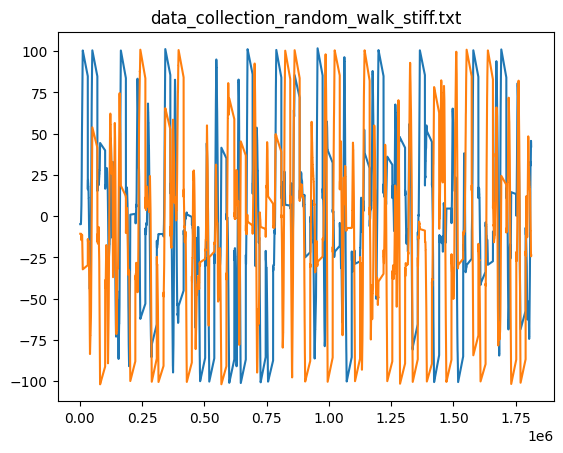

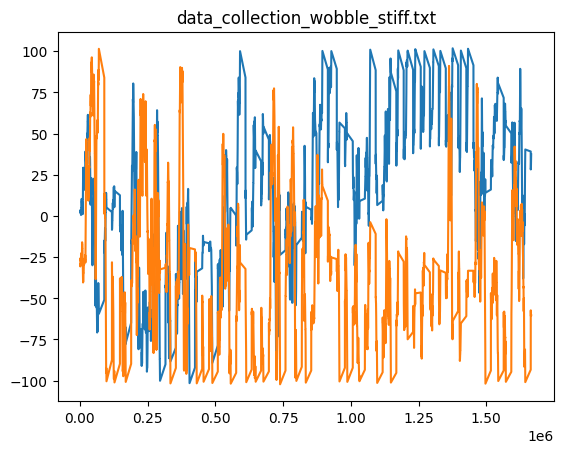

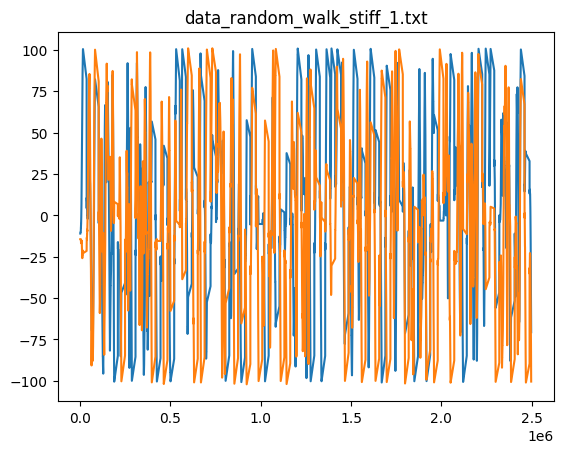

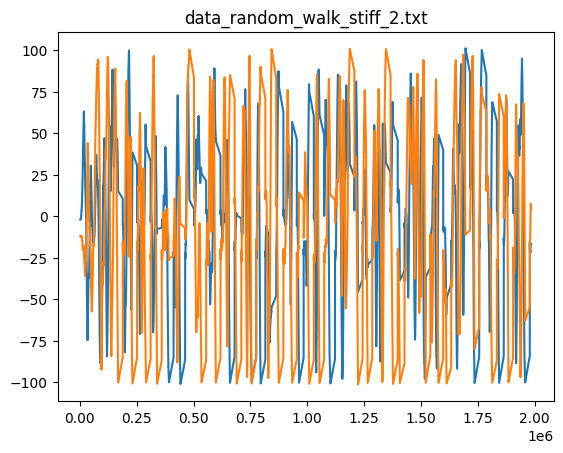

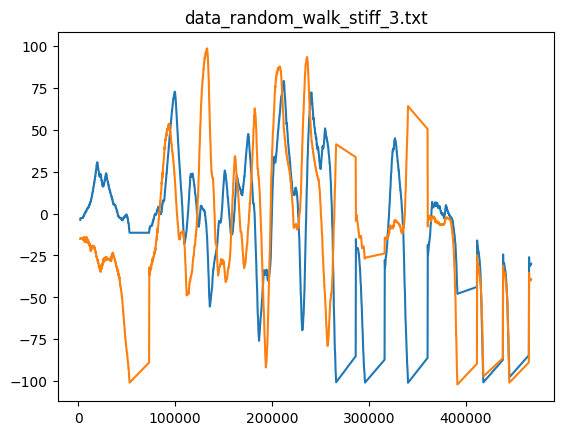

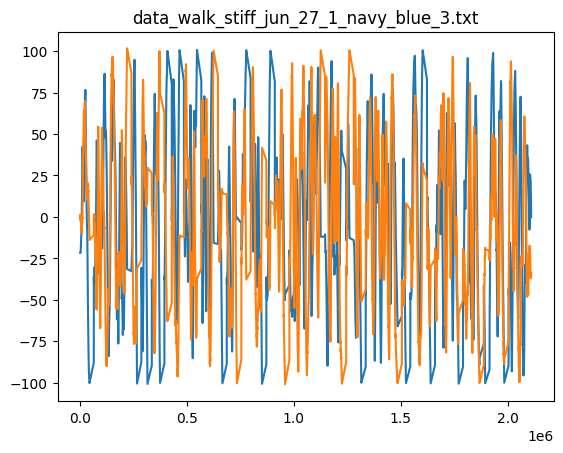

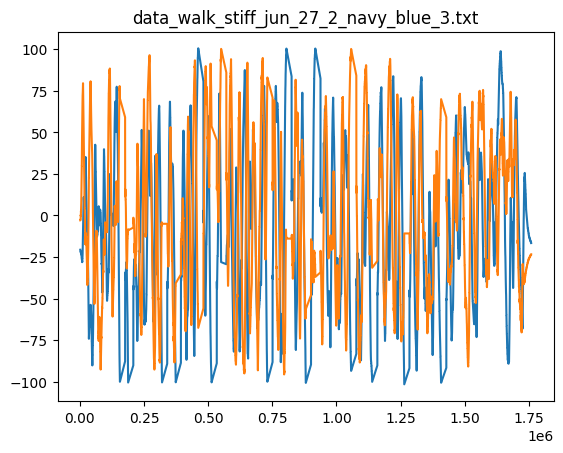

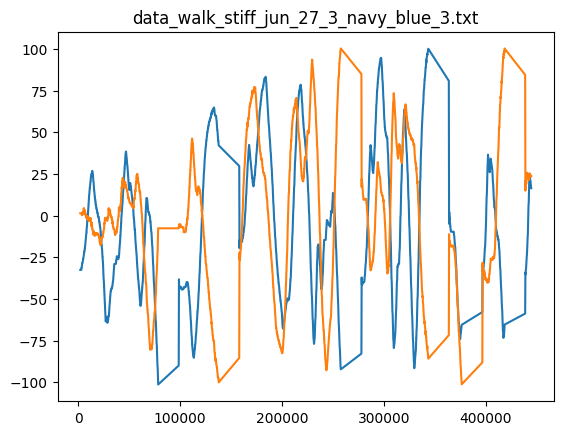

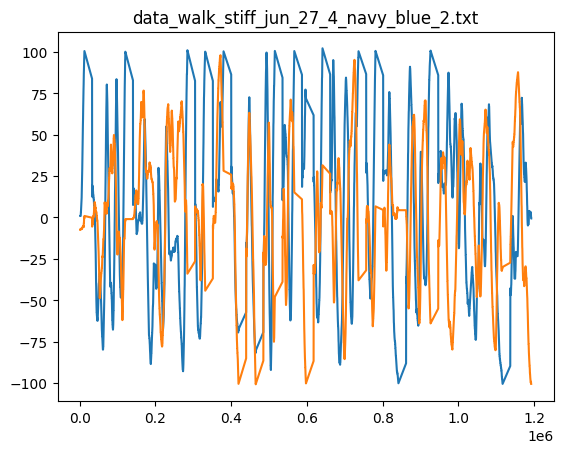

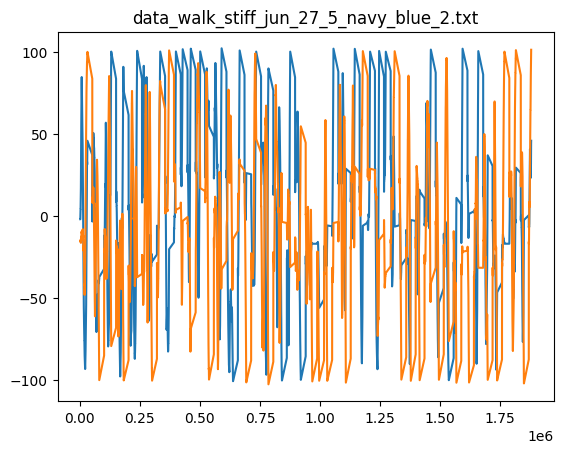

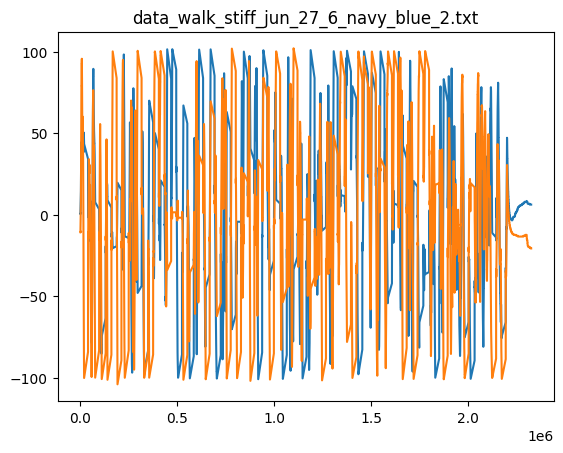

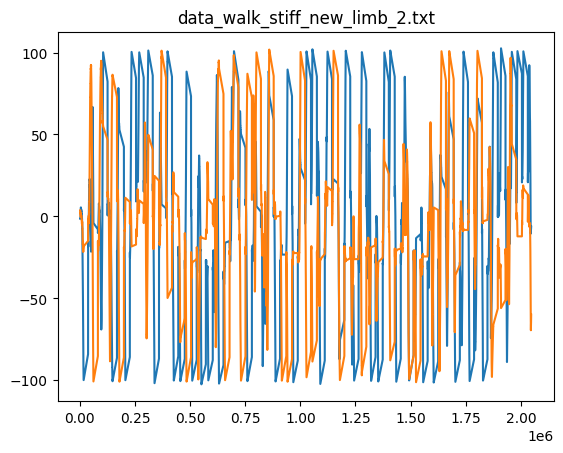

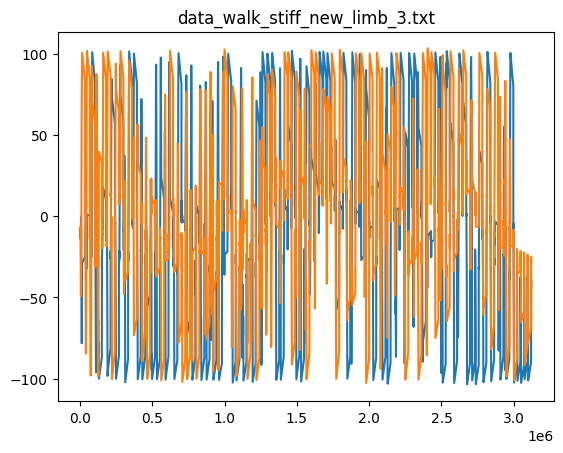

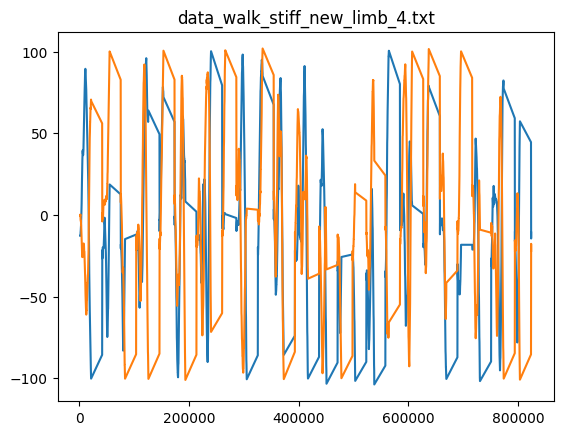

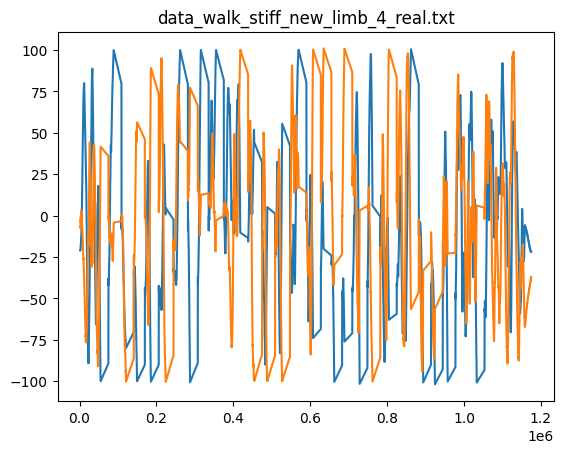

In [26]:
import os
directory = '../data/limb_data'
total_len = 0
for filename in os.scandir(directory):
    # print(filename.path)
    data = pd.read_csv(str(filename.path))
    # print(filename.name)
    plt.figure()
    plt.plot(data['time'], data['theta_x'], label='theta_x')
    plt.plot(data['time'], data['theta_y'], label='theta_y')
    plt.title(filename.name)
    total_len += len(data)
print(total_len)